# 复习

/tmp/ipykernel_22400/1343866779.py:136: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_22400/1343866779.py:136: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_22400/1343866779.py:136: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_22400/1343866779.py:136: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_22400/1343866779.py:136: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_22400/1343866779.py:136: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_22400/1343866779.py:136: UserWarning: Glyph 29366 (\N{CJK UNIFIED IDEOGRAPH-72B6}) missing from current font.

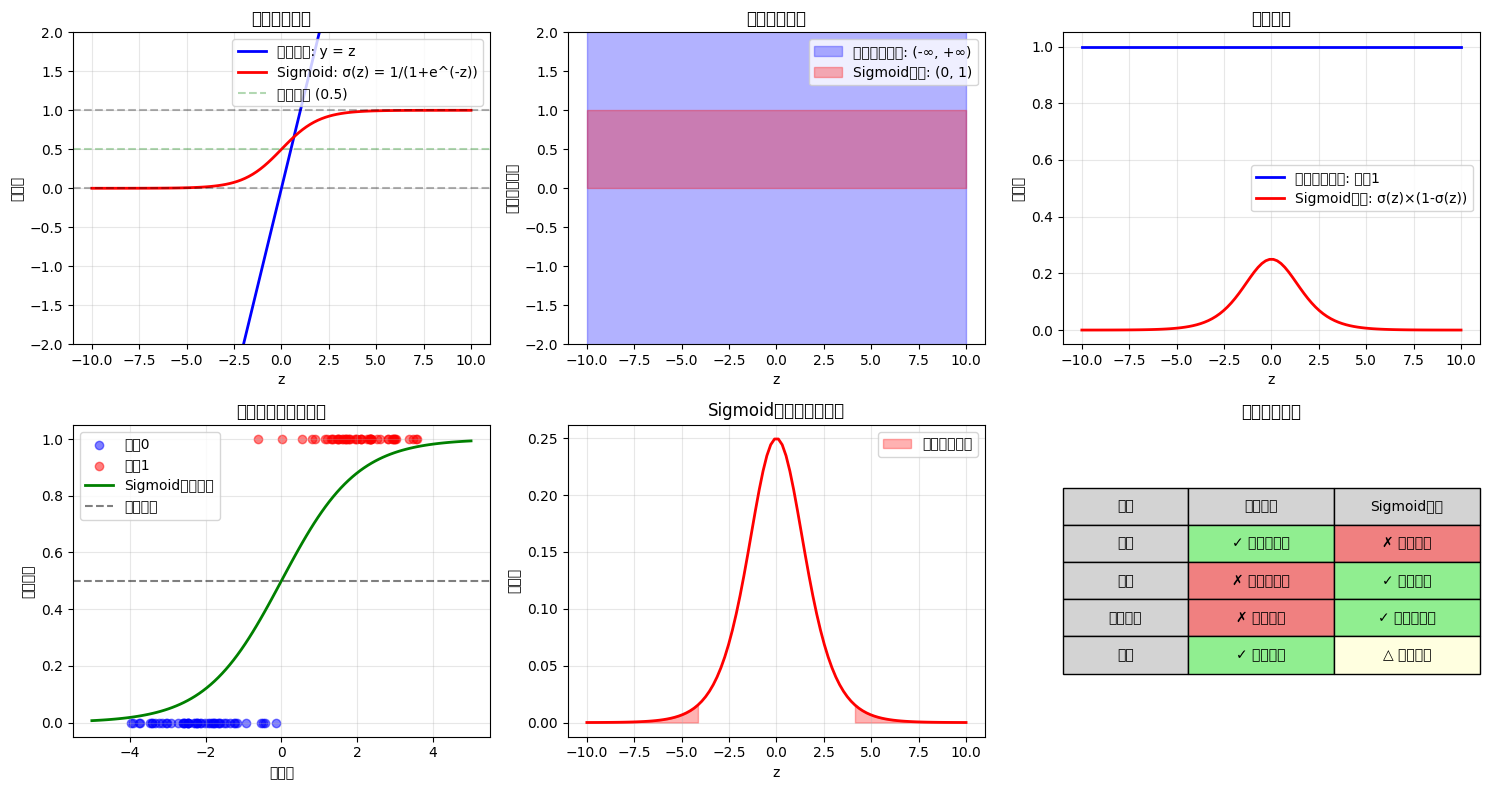

Sigmoid vs 线性函数 关键区别总结

1. 数学表达式:
   线性: y = wx + b
   Sigmoid: σ(z) = 1 / (1 + e^(-z))

2. 输出范围:
   线性: (-∞, +∞)
   Sigmoid: (0, 1)

3. 主要用途:
   线性: 回归问题，预测连续值
   Sigmoid: 分类问题，输出概率

4. 计算复杂度:
   线性: O(1) - 简单乘加
   Sigmoid: O(1) - 但包含指数运算，更耗时

5. 梯度特性:
   线性: 梯度恒定，不会消失
   Sigmoid: 在极端值处梯度接近0（梯度消失）


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """Sigmoid激活函数"""
    return 1 / (1 + np.exp(-z))

def linear(z):
    """线性函数"""
    return z

def sigmoid_derivative(z):
    """Sigmoid函数的导数"""
    s = sigmoid(z)
    return s * (1 - s)

# 创建输入数据
z = np.linspace(-10, 10, 100)

# 创建图形
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# 1. 函数对比
ax = axes[0, 0]
ax.plot(z, linear(z), 'b-', label='线性函数: y = z', linewidth=2)
ax.plot(z, sigmoid(z), 'r-', label='Sigmoid: σ(z) = 1/(1+e^(-z))', linewidth=2)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.axhline(y=1, color='k', linestyle='--', alpha=0.3)
ax.axhline(y=0.5, color='g', linestyle='--', alpha=0.3, label='决策边界 (0.5)')
ax.grid(True, alpha=0.3)
ax.set_xlabel('z')
ax.set_ylabel('输出值')
ax.set_title('函数形状对比')
ax.legend()
ax.set_ylim(-2, 2)

# 2. 值域对比
ax = axes[0, 1]
# 线性函数的输出范围
linear_output = linear(z)
sigmoid_output = sigmoid(z)
ax.fill_between(z, -10, 10, alpha=0.3, color='blue', label='线性函数值域: (-∞, +∞)')
ax.fill_between(z, 0, 1, alpha=0.3, color='red', label='Sigmoid值域: (0, 1)')
ax.set_xlabel('z')
ax.set_ylabel('可能的输出值')
ax.set_title('输出值域对比')
ax.legend()
ax.set_ylim(-2, 2)

# 3. 导数对比
ax = axes[0, 2]
ax.plot(z, np.ones_like(z), 'b-', label='线性函数导数: 常数1', linewidth=2)
ax.plot(z, sigmoid_derivative(z), 'r-', label='Sigmoid导数: σ(z)×(1-σ(z))', linewidth=2)
ax.grid(True, alpha=0.3)
ax.set_xlabel('z')
ax.set_ylabel('导数值')
ax.set_title('导数对比')
ax.legend()

# 4. 二分类应用示例
ax = axes[1, 0]
# 生成示例数据
np.random.seed(42)
x_class0 = np.random.randn(50) - 2
x_class1 = np.random.randn(50) + 2
ax.scatter(x_class0, np.zeros_like(x_class0), alpha=0.5, label='类别0', color='blue')
ax.scatter(x_class1, np.ones_like(x_class1), alpha=0.5, label='类别1', color='red')
# 绘制sigmoid决策边界
x_range = np.linspace(-5, 5, 100)
ax.plot(x_range, sigmoid(x_range), 'g-', linewidth=2, label='Sigmoid分类边界')
ax.axhline(y=0.5, color='k', linestyle='--', alpha=0.5, label='决策阈值')
ax.set_xlabel('特征值')
ax.set_ylabel('预测概率')
ax.set_title('二分类问题中的应用')
ax.legend()
ax.grid(True, alpha=0.3)

# 5. 梯度消失问题
ax = axes[1, 1]
z_extreme = np.linspace(-10, 10, 100)
gradient = sigmoid_derivative(z_extreme)
ax.plot(z_extreme, gradient, 'r-', linewidth=2)
ax.fill_between(z_extreme[z_extreme < -4], 0, gradient[z_extreme < -4], 
                 alpha=0.3, color='red', label='梯度消失区域')
ax.fill_between(z_extreme[z_extreme > 4], 0, gradient[z_extreme > 4], 
                 alpha=0.3, color='red')
ax.set_xlabel('z')
ax.set_ylabel('梯度值')
ax.set_title('Sigmoid的梯度消失问题')
ax.legend()
ax.grid(True, alpha=0.3)

# 6. 实际应用对比
ax = axes[1, 2]
# 创建表格数据
applications = [
    ['用途', '线性函数', 'Sigmoid函数'],
    ['回归', '✓ 预测连续值', '✗ 输出受限'],
    ['分类', '✗ 无概率意义', '✓ 输出概率'],
    ['神经网络', '✗ 无非线性', '✓ 提供非线性'],
    ['优化', '✓ 简单快速', '△ 梯度消失']
]

# 创建表格
colors = []
for i, row in enumerate(applications):
    if i == 0:  # 标题行
        colors.append(['lightgray'] * 3)
    else:
        row_colors = []
        for j, cell in enumerate(row):
            if j == 0:  # 第一列
                row_colors.append('lightgray')
            elif '✓' in cell:
                row_colors.append('lightgreen')
            elif '✗' in cell:
                row_colors.append('lightcoral')
            else:
                row_colors.append('lightyellow')
        colors.append(row_colors)

table = ax.table(cellText=applications, loc='center', cellLoc='center',
                colWidths=[0.3, 0.35, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# 设置单元格颜色
for i in range(len(applications)):
    for j in range(3):
        table[(i, j)].set_facecolor(colors[i][j])

ax.axis('off')
ax.set_title('应用场景对比')

plt.tight_layout()
plt.savefig('/home/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/supervised_learning/week3/sigmoid_vs_linear_comparison.png', dpi=150)
plt.show()

# 打印关键特性对比
print("="*60)
print("Sigmoid vs 线性函数 关键区别总结")
print("="*60)
print("\n1. 数学表达式:")
print("   线性: y = wx + b")
print("   Sigmoid: σ(z) = 1 / (1 + e^(-z))")
print("\n2. 输出范围:")
print("   线性: (-∞, +∞)")
print("   Sigmoid: (0, 1)")
print("\n3. 主要用途:")
print("   线性: 回归问题，预测连续值")
print("   Sigmoid: 分类问题，输出概率")
print("\n4. 计算复杂度:")
print("   线性: O(1) - 简单乘加")
print("   Sigmoid: O(1) - 但包含指数运算，更耗时")
print("\n5. 梯度特性:")
print("   线性: 梯度恒定，不会消失")
print("   Sigmoid: 在极端值处梯度接近0（梯度消失）")
print("="*60)